# Обработка результатов

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
k = [0, 10, 30, 50]
n = [0, 1, 2, 3, 4]

In [3]:
def get_graph(roc_reslut_tmp, title):
    plt.plot(k[1:], roc_reslut_tmp[1:], 'ro')
    plt.plot(k[:1], roc_reslut_tmp[:1], 'bo')
    plt.xlabel('k')
    plt.ylabel('roc auc mean')
    plt.title(title)

In [4]:
def get_graph_clas(roc_reslut_tmp, title):
    assert(len(roc_reslut_tmp) == 15)
    plt.plot(n, roc_reslut_tmp[:5], 'go')
    plt.plot(n, roc_reslut_tmp[5:][:5], 'ro')
    plt.plot(n, roc_reslut_tmp[10:], 'bo')
    plt.ylabel('roc auc mean')
    plt.title(title)

## Как влияет понижение размерности с использованием Logistic Regression

In [5]:
result = pd.read_csv("Results/results_lowrank.csv")
roc_result = result.as_matrix(["grid_roc_auc_mean"])

In [6]:
roc_orig_orig_minmax         = roc_result[[0, 2, 4, 6]].reshape(4,)
roc_orig_orig_orig           = roc_result[[1, 3, 5, 7]].reshape(4,)

roc_orig_spectral_minmax     = roc_result[[8, 10, 12, 14]].reshape(4,)
roc_orig_spectral_orig       = roc_result[[9, 11, 13, 15]].reshape(4,)

roc_binar_orig_minmax        = roc_result[[16, 18, 20, 22]].reshape(4,)
roc_binar_orig_orig          = roc_result[[17, 19, 21, 23]].reshape(4,)

roc_binar_spectral_minmax    = roc_result[[24, 26, 28, 30]].reshape(4,)
roc_binar_spectral_orig      = roc_result[[25, 27, 28, 31]].reshape(4,)

roc_wbsqdist_orig_minmax     = roc_result[[32, 34, 36, 38]].reshape(4,)
roc_wbsqdist_orig_orig       = roc_result[[33, 35, 37, 39]].reshape(4,)

roc_wbsqdist_spectral_minmax = roc_result[[40, 42, 44, 46]].reshape(4,)
roc_wbsqdist_spectral_orig   = roc_result[[41, 43, 45, 47]].reshape(4,)

**Синяя точка:** оригинальныльный результат   
**Красные точки:** результат и спользование понжиении размерности только через собственные вектора

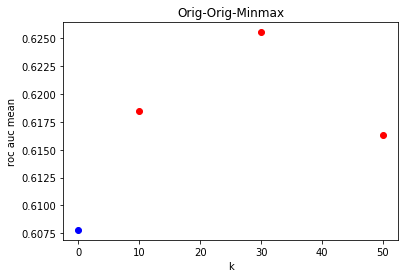

In [7]:
get_graph(roc_orig_orig_minmax, 'Orig-Orig-Minmax')

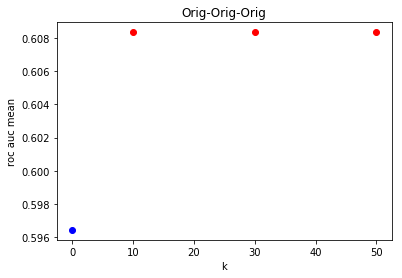

In [8]:
get_graph(roc_orig_orig_orig, "Orig-Orig-Orig")

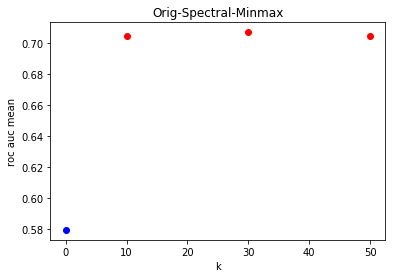

In [9]:
get_graph(roc_orig_spectral_minmax, "Orig-Spectral-Minmax")

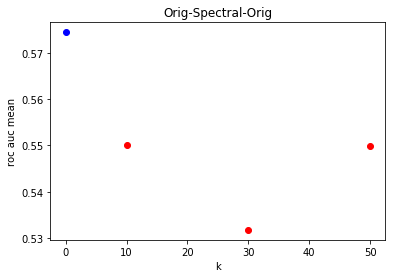

In [10]:
get_graph(roc_orig_spectral_orig, "Orig-Spectral-Orig")

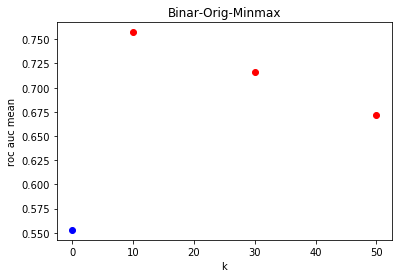

In [11]:
get_graph(roc_binar_orig_minmax, "Binar-Orig-Minmax")

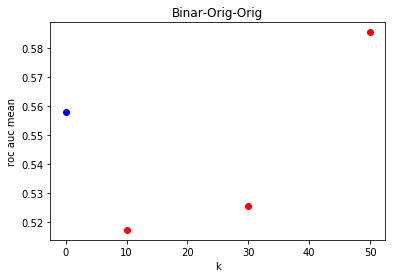

In [12]:
get_graph(roc_binar_orig_orig, "Binar-Orig-Orig")

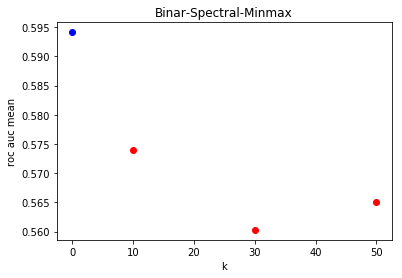

In [13]:
get_graph(roc_binar_spectral_minmax, "Binar-Spectral-Minmax")

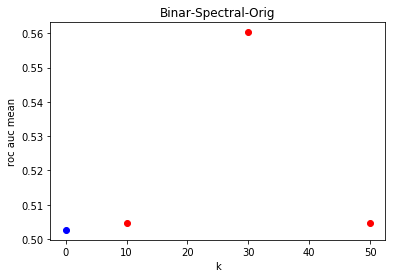

In [14]:
get_graph(roc_binar_spectral_orig, "Binar-Spectral-Orig")

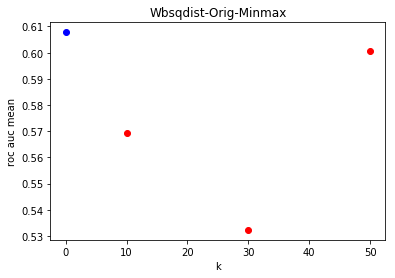

In [15]:
get_graph(roc_wbsqdist_orig_minmax, "Wbsqdist-Orig-Minmax")

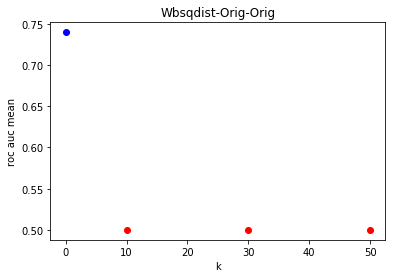

In [16]:
get_graph(roc_wbsqdist_orig_orig, "Wbsqdist-Orig-Orig")

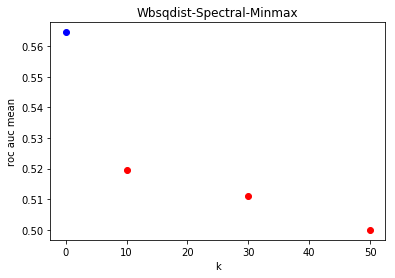

In [17]:
get_graph(roc_wbsqdist_spectral_minmax, "Wbsqdist-Spectral-Minmax")

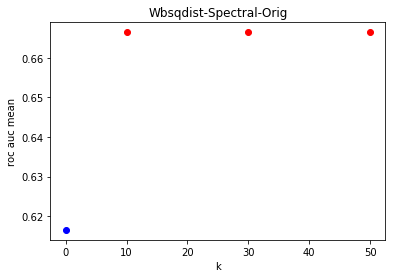

In [18]:
get_graph(roc_wbsqdist_spectral_orig, "Wbsqdist-Spectral-Orig")

## Как реагируют разные классификаторы на понижение размерности 

In [19]:
result = pd.read_csv("Results/results_LR_SVC_SGD.csv")
roc_result_LR_SVC_SGD = result.as_matrix(["grid_roc_auc_mean"])
result = pd.read_csv("Results/results_RF.csv")
roc_result_RF = result.as_matrix(["grid_roc_auc_mean"])
result = pd.read_csv("Results/results_XGB.csv")
roc_result_XGB = result.as_matrix(["grid_roc_auc_mean"])

In [20]:
roc_orig  = np.vstack([roc_result_LR_SVC_SGD[[0, 1, 2]], roc_result_RF[0], roc_result_XGB[0], 
                       roc_result_LR_SVC_SGD[[3, 4, 5]], roc_result_RF[1], roc_result_XGB[1],
                       roc_result_LR_SVC_SGD[[5, 6, 7]], roc_result_RF[2], roc_result_XGB[2]]).reshape(15,)

roc_binar = np.vstack([roc_result_LR_SVC_SGD[[8 , 9 , 10]], roc_result_RF[3], roc_result_XGB[3], 
                       roc_result_LR_SVC_SGD[[11, 12, 13]], roc_result_RF[4], roc_result_XGB[4],
                       roc_result_LR_SVC_SGD[[14, 15, 16]], roc_result_RF[5], roc_result_XGB[5]]).reshape(15,)

На графике справа на лево расположены езультаты 5 классификаторов: **LR, SVC, SGD, RF, XGB**.   
   
**Зеленые точки** без использования понижения размерности   
**Красные точки:** использование только собственных векторов   
**Синие точки:** использование соственных векторов, умноженных на их собственные значения   

In [21]:
p = [1, 2, 3, 4, 5, 6, 7, 8, 9]
p[3:][:3]

[4, 5, 6]

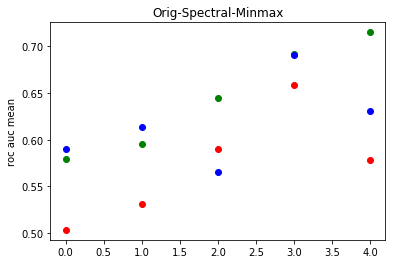

In [22]:
get_graph_clas(roc_orig, 'Orig-Spectral-Minmax')

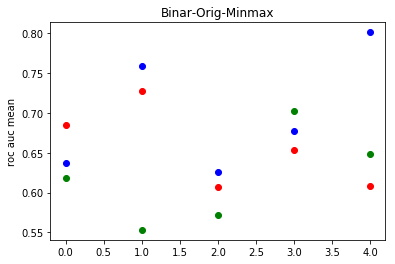

In [23]:
get_graph_clas(roc_binar, 'Binar-Orig-Minmax')